## **Análisis de Sistemas Térmicos usando Python**

In [ ]:
pip install Coolprop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import CoolProp.CoolProp as cp

Para este ejemplo trabajaremos con **Agua**.

Definiremos como Temperatura de referencia 298 K y Presión de referenica 1 atmósfera: 101,325 kPa

In [ ]:
fluid = "water"
ref_temp = 298 # K
ref_press = 101325 # Pa

Calculamos la densidad del agua a la Temperatura y presión de referencia. Para ello, con se emplea la función "PropsSI" que de manera general se enuncia como sigue:

```
PropsSI("str de la propiedad que deseo","str de la propiedad 1 que tengo",
valor_prop_1, "str de la propiedad 2 que tengo", valor_prop_2, "str de la sustancia")
```
Pueden revisar las propiedaes de entrada/salida que admite esta función y cómo se deben ingresar en la función en este [enlace](http://www.coolprop.org/coolprop/HighLevelAPI.html#table-of-string-inputs-to-propssi-function).



In [ ]:
density = cp.PropsSI("D", "T", ref_temp, "P", ref_press, fluid)
density # kg/m^3

997.0860088230806

Notar que la biblioteca CoolProp entrega los valores en unidades SI.
En este caso, $kg/m^3$


Y podríamos pedirle que evalue la fase en la que se encuentra el agua

In [ ]:
phase = cp.PhaseSI("T", ref_temp, "P", ref_press, fluid)
phase

'liquid'

Podemos notar que se repite un cierto patrón en como obtener información acerca del fluido. Para conocer una propiedad en específico, se tiene que tener información de dos variables termodinámicas, que en este caso, son la presión y la temperatura. 

## **Segunda parte:** Uso de CoolProp junto con otras librerías de python


Comenzamos trabajando con arreglos, de manera que definimos un rango de temperatura en donde podemos determinar alguna propiedad del agua a una presión fija, que será la que definimos al principio (101,325 kPa). Para crear y trabajar con arreglos numéricos (vectores o arrays), se empleará la librería [NumPy](https://numpy.org/doc/stable/user/quickstart.html).


Importamos la librería:

In [ ]:
import numpy as np

Definimos un rango de temperatura entre los 273,153 K a 353,153 K (0 a 80 °C) a la misma presión anterior.

In [ ]:
temp_range = np.linspace(0, 80, 81) + 273.153 # K - linspace(start, stop, numero de elementos entre start y stop)
temp_range

array([273.153, 274.153, 275.153, 276.153, 277.153, 278.153, 279.153,
       280.153, 281.153, 282.153, 283.153, 284.153, 285.153, 286.153,
       287.153, 288.153, 289.153, 290.153, 291.153, 292.153, 293.153,
       294.153, 295.153, 296.153, 297.153, 298.153, 299.153, 300.153,
       301.153, 302.153, 303.153, 304.153, 305.153, 306.153, 307.153,
       308.153, 309.153, 310.153, 311.153, 312.153, 313.153, 314.153,
       315.153, 316.153, 317.153, 318.153, 319.153, 320.153, 321.153,
       322.153, 323.153, 324.153, 325.153, 326.153, 327.153, 328.153,
       329.153, 330.153, 331.153, 332.153, 333.153, 334.153, 335.153,
       336.153, 337.153, 338.153, 339.153, 340.153, 341.153, 342.153,
       343.153, 344.153, 345.153, 346.153, 347.153, 348.153, 349.153,
       350.153, 351.153, 352.153, 353.153])

Calculamos la densidad en función de la temperatura y a presión constante.

In [ ]:
density_range = cp.PropsSI("D", "T", temp_range, "P", ref_press, fluid)
density_range

array([999.84328867, 999.90198706, 999.94310064, 999.96721173,
       999.97486802, 999.96658535, 999.94285019, 999.90412189,
       999.85083472, 999.78339973, 999.7022064 , 999.60762421,
       999.50000395, 999.37967908, 999.24696683, 999.10216929,
       998.94557436, 998.77745669, 998.59807843, 998.40769008,
       998.20653111, 997.99483068, 997.77280816, 997.54067375,
       997.29862897, 997.04686713, 996.7855738 , 996.51492719,
       996.23509858, 995.94625262, 995.64854773, 995.34213636,
       995.02716534, 994.7037761 , 994.37210496, 994.03228336,
       993.6844381 , 993.32869154, 992.96516183, 992.59396304,
       992.2152054 , 991.82899545, 991.43543617, 991.03462717,
       990.62666481, 990.21164233, 989.78964999, 989.36077519,
       988.92510258, 988.48271413, 988.03368932, 987.57810513,
       987.11603623, 986.64755499, 986.17273161, 985.69163418,
       985.20432874, 984.7108794 , 984.21134835, 983.70579596,
       983.19428082, 982.67685983, 982.15358821, 981.62

Visualizamos gráficamente nuestro resultado mediante un gráfico $\rho_w(T)$ a través del uso del módulo pyplot de la librería [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

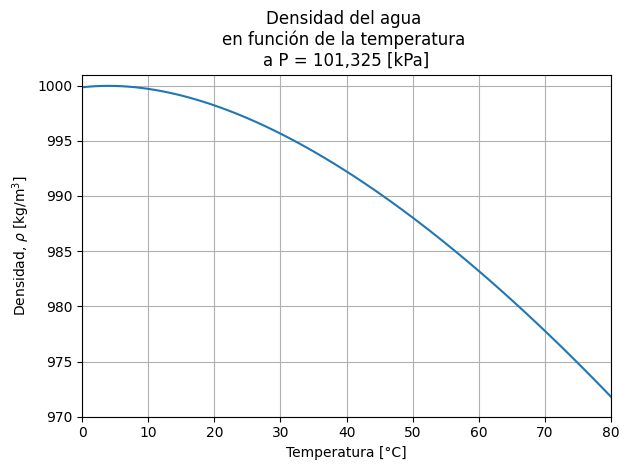

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(temp_range - 273.153, density_range)
plt.xlabel("Temperatura [°C]")
plt.ylabel(r"Densidad, $\rho$ [kg/m$^3$]")
plt.title("Densidad del agua \nen función de la temperatura \na P = 101,325 [kPa]")
plt.xlim([0, 80])
plt.ylim([970, 1001])
plt.grid(True)
plt.tight_layout()